## Linear Regression

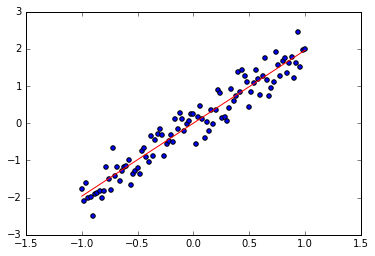

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.mul(X, w)

w = tf.Variable(0.0, name="weights")

y_model = model(X,w)
cost = (tf.square(Y-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})
    w_val = sess.run(w)

sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

## Polynomial Model

* When data points appear to form smooth curves rather than straight lines, we need to change our regression model from a straight line to something else.
* One such approach is to use a polynomial model.
* A polynomial is a generalization of a linear function.
* The $n^{th}$ degree polynomial looks like the following :
* f(x) = $WnX^{n}$ + … + $W2X^{2}$ + $W1X$ + $W0$

[ 0.80771381  0.919765    3.40821886  6.10151386  5.03969669  6.27762461]


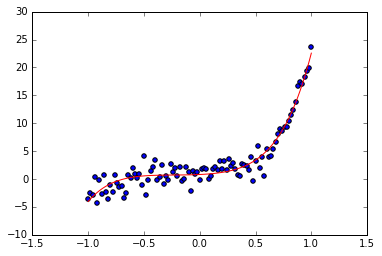

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_coeffs = 6
training_epochs = 40
learning_rate = 0.01

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.mul(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

def gettrY():
    trY = 0
    trY_coeffs = [1,2,3,4,5,6]
    for i in range(num_coeffs):
        trY += trY_coeffs[i] * np.power(trX, i)
    
    trY += np.random.randn(*trX.shape) * 1.5
    return trY

def gettrX():
    return np.linspace(-1, 1, 101)

trX = gettrX()
trY = gettrY()
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X:x, Y:y})
        
w_val = sess.run(w)
print(w_val)

sess.close()

plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()